In [1]:
import pandas as pd
import numpy as np

data = {
    "L8": {
        "BFS": (354.6, "00:00:001467"), 
        "IDS": (934.05, "00:00:001320"),
        "h1": (38.65, "00:00:000151"),
        "h2": (35.2, "00:00:000208"),
        "h3": (34.8, "00:00:000235"),
    },
    "L15": {
        "BFS": (11787.25, "00:00:825311"),
        "IDS": (128848.6, "00:00:180038"),
        "h1": (789.25, "00:00:011103"),
        "h2": (263.6, "00:00:002453"),
        "h3": (262.8, "00:00:002614"),
    },
    "L24": {
        "BFS": (291417.7, "03:40:036316"),
        "IDS": (808904.55, "00:01:131871"),
        "h1": (36665.15, "00:16:107638"),
        "h2": (5403.9, "00:00:471672"),
        "h3": (5403.8, "00:00:474701"),
    },
}

df = pd.DataFrame(data)
df = df.stack().apply(pd.Series)
df.columns = ["avg_nodes", "avg_time"]
df = df.reset_index()
df = df.rename(columns={"level_0": "algorithm", "level_1": "level"})
df
df["avg_time"] = df["avg_time"].apply(
    lambda x: int(x.split(":")[0]) * 60
    + int(x.split(":")[1])
    + int(x.split(":")[2]) / 1000000
)
# compute log of avg_nodes and avg_time
df["log_avg_nodes"] = df["avg_nodes"].apply(lambda x: np.log(x))
df["log_avg_time"] = df["avg_time"].apply(lambda x: np.log(x))
df

,algorithm,level,avg_nodes,avg_time,log_avg_nodes,log_avg_time
0,BFS,L8,354.60,0.001467,5.870990,-6.524536
1,BFS,L15,11787.25,0.825311,9.374774,-0.191995
2,BFS,L24,291417.70,220.036316,12.582513,5.393793
3,IDS,L8,934.05,0.001320,6.839530,-6.630124
4,IDS,L15,128848.60,0.180038,11.766393,-1.714587
5,IDS,L24,808904.55,1.131871,13.603436,0.123872
6,h1,L8,38.65,0.000151,3.654547,-8.798231
7,h1,L15,789.25,0.011103,6.671083,-4.500540
8,h1,L24,36665.15,16.107638,10.509582,2.779294
9,h2,L8,35.20,0.000208,3.561046,-8.477972


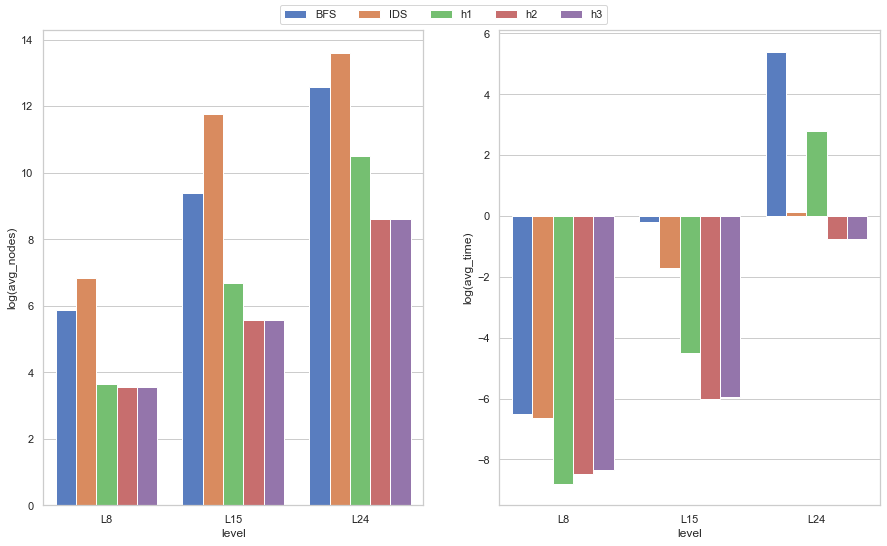

In [19]:

# plot histograms for each level and color by algorithm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)

# Plot the log of avg_nodes
sns.barplot(
    x="level",
    y="log_avg_nodes",
    hue="algorithm",
    data=df,
    palette="muted",
    ax=axes[0],
)

# Plot the total time
sns.barplot(
    x="level",
    y="log_avg_time",
    hue="algorithm",
    data=df,
    palette="muted",
    ax=axes[1],
)

# Add a legend and informative axis label
axes[0].set_ylabel("log(avg_nodes)")
axes[1].set_ylabel("log(avg_time)")

# keep only one legend
handles, labels = axes[0].get_legend_handles_labels()
f.legend(handles, labels, loc="upper center", ncol=5)

# remove spacing between legend and subplots
f.subplots_adjust(top=0.95)

# remove legends from subplots
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# save figure to file

f.savefig("figs/graph.png")